 # Module Imports
 ##### This cell imports all the necessary Python libraries used throughout the project.
 ##### Below is the role of each:
* **numpy**
 * For numerical computations, handling arrays, replacing or working with 
* **pandas**
 * NaN values.
 * For loading CSV files, creating DataFrames, performing data cleaning, and data manipulation.
 * **matplotlib.pyplot**
 * For creating visualizations like bar plots, scatter plots, line plots, and histograms.
 * **seaborn**
 * For advanced statistical visualizations, such as heatmaps, pairplots, distplots, and improving plot aesthetics.
 * **sklearn.preprocessing.StandardScaler**
 * Scales data by removing the mean and scaling to unit variance (used when features need normalization).
 * **sklearn.preprocessing.MinMaxScaler**
 * Scales data to a specified range, usually between 0 and 1 (used when features need scaling to a uniform range).
 * **sklearn.metrics (accuracy_score, confusion_matrix, classification_report)**
 * Provides tools to evaluate the performance of machine learning models (accuracy percentage, confusion matrices, 
 * precision, recall, F1 score).
 * **sklearn.svm.SVC**
 * Support Vector Classifier used for classification tasks in machine learning.
 * **pickle**
 * For saving (serializing) and loading trained machine learning models, allowing reuse without retraining
 

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
import pickle


# Data Loading Class
 ##### This class (DataLoading) is responsible for :
 * Reading the CSV file into a DataFrame
 * Providing methods to check the dataset’s shape, column names, info, summary stats, and preview rows

In [3]:
class Data_loader:
    
    """
    DataLoading Class
    ----------------
    This class handles:
        - Loading the dataset into a pandas DataFrame
        - Providing initial data exploration and understanding
    Purpose:
        Allows users to inspect the data structure, check its basic properties, 
        and understand the data types, shapes, and sample values before moving to preprocessing.
    Attributes:
        file_path (str): The file path to the dataset (CSV format)
        df (DataFrame): The loaded pandas DataFrame
    """

    def __init__(self, file_path):
        self.file_path = file_path
        """
        Requirements:
            file_path : str (required)
            The path to the CSV file containing the dataset.
        Description:
            Initializes the DataLoading class and loads the dataset into a pandas DataFrame.
        """   
        self.data = None

    def load_data(self):
        """
        Requirements:
            None
        Description:
            Returns the loaded dataset as a pandas DataFrame.
        Purpose:
            Provides access to the dataset for further exploration and analysis.

        """
        self.data = pd.read_csv(self.file_path)
        print(f"\nData loaded successfully ")
        return self.data
        

    def show_head(self, n=5):
        
        """
        Requirements:
                n : int (default = 5)
            Number of top rows to display.
        Description:
            Returns the top n rows of the dataset.
        Purpose:
            Allows previewing the first few records to understand the data format.
        """

        print(f"\nFirst {n} rows of the data:")
        return self.data.head(n)

    def show_tail(self, n=5):
        
        """
        Requirements:
            n : int (default = 5)
                Number of bottom rows to display.
        Description:
            Returns the bottom n rows of the dataset.
        Purpose:
            Allows previewing the last few records to check trailing data.
        """
        
        print(f"\nLast {n} rows of the data:")
        return self.data.tail(n)

    def show_shape(self):
        
        """
        Requirements:
        None
        Description:
        Returns the shape (rows, columns) of the dataset.
        Purpose:
        Helps understand the size of the dataset.
        """
        
        print("\nShape of the data:")   
        return self.data.shape

    def show_info(self):
        
        """
        Requirements:
            None
        Description:
            Returns dataset information such as:
            - column names
            - data types
            - non-null counts
            - memory usage
        Purpose:
            Helps understand data types and missing value patterns.
        """
        
        print("\nInfo of the data:")
        return self.data.info()

    def show_describe(self):
        
        """
        Requirements:
            None
        Description:
            Returns summary statistics (count, mean, std, min, max, quartiles) for numeric columns.
        Purpose:
            Provides a quick overview of the data distribution and central tendencies.
        """
        
        print("\nDescription of the data:")
        return self.data.describe()

    def show_dtypes(self):
        
        """
        Requirements:
            None
        Description:
            Returns the data types of each column in the dataset.
        Purpose:
            Provides insight into the data types used in the dataset,
            which is crucial for understanding how to handle each column during preprocessing.
        """
        
        
        print("\nData types of each column:")
        return self.data.dtypes

    def show_nulls(self):
        
        """
        Requirements:
            None
        Description:
            Returns the count of null values in each column of the dataset.
        Purpose:
            Provides insight into missing data patterns,
            which is crucial for understanding data quality and planning preprocessing steps.
        """
        
        print("\nNull values in the data:")
        return self.data.isnull().sum()

    
    

# Data Preprocessing Class
 This class (DataPreprocessing) is responsible for:
 * Cleaning the dataset by handling duplicates, zero values, and null values.
 * Providing methods to replace or fill missing data using mean, median, or mode.
 * Ensuring the dataset is clean and ready for analysis or modeling.**

In [4]:
import pandas as pd
import numpy as np

class Data_preprocessing:
    """
    DataPreprocessing Class
    -----------------------
    Requirements:
        - pandas and numpy libraries

    Description:
        This class handles:
        - Cleaning and preparing the dataset before modeling
        - Checking for duplicates, null values, zero values
        - Replacing or filling missing or invalid data

    Purpose:
        Ensures the data is clean, consistent, and ready for further analysis or modeling.
        Works on a copy of the original DataFrame to preserve the raw dataset.
    """

    def __init__(self, data):
        """
        Requirements:
            data : pandas DataFrame (required)

        Description:
            Initializes the class and stores a copy of the input data in self.data.

        Purpose:
            Allows safe preprocessing without modifying the original dataset.
        """
        self.data = data.copy()

    def drop_duplicates(self):
        """
        Requirements:
            None

        Description:
            Removes all duplicate rows from the dataset.

        Purpose:
            Prevents redundant entries that may distort analysis or training.
        """
        self.data = self.data.drop_duplicates()
        return self.data

    def check_nulls(self):
        """
        Requirements:
            None

        Description:
            Returns count of missing (null) values per column.

        Purpose:
            Helps locate incomplete data requiring imputation or cleaning.
        """
        return self.data.isnull().sum()

    def check_zeros(self, columns):
        """
        Requirements:
            columns : list of str (column names)

        Description:
            Checks for zero values in specified numeric columns.

        Purpose:
            Identifies invalid or default values often requiring treatment.
        """
        zero_counts = {}
        for col in columns:
            zero_counts[col] = (self.data[col] == 0).sum()
        return zero_counts

    def replace_zeros_with_null(self, columns):
        """
        Requirements:
            columns : list of str (column names)

        Description:
            Replaces all zeroes in the given columns with NaN.

        Purpose:
            Converts invalid values to a standard missing format for further processing.
        """
        for col in columns:
            self.data[col] = self.data[col].replace(0, np.nan)
        return self.data

    def fill_null_with_mean(self, column):
        """
        Requirements:
            column : str

        Description:
            Fills missing values in the column using its mean value.

        Purpose:
            Suitable for normally distributed numerical columns.
        """
        mean_value = self.data[column].mean()
        self.data[column] = self.data[column].fillna(mean_value)
        return self.data

    def fill_null_with_median(self, column):
        """
        Requirements:
            column : str

        Description:
            Fills missing values in the column using its median value.

        Purpose:
            Robust against outliers, ideal for skewed numerical data.
        """
        median_value = self.data[column].median()
        self.data[column] = self.data[column].fillna(median_value)
        return self.data

    def fill_null_with_mode(self, column):
        """
        Requirements:
            column : str

        Description:
            Fills missing values in the column using its most frequent (mode) value.

        Purpose:
            Best suited for categorical or nominal features.
        """
        mode_value = self.data[column].mode()[0]
        self.data[column] = self.data[column].fillna(mode_value)
        return self.data

    def preprocess_data(self):
        """
        Requirements:
            None

        Description:
            General preprocessing including:
            - Dropping unnamed index column (if exists)
            - Filling missing numeric values with column mean

        Purpose:
            Cleans typical raw data issues quickly and efficiently.
        """
        

# Graphs Class
 This class (Graphs) contains reusable methods for generating:
*    Bar charts
*    Pie charts
*    Histograms (basic + distplot)
*    Box plots
*    Violin plots
*    Line charts
*    Scatter plots
*    Count plots
*    Swarm plots (for small datasets)
*    Pair plots
*    Correlation heatmaps

 It separates graph logic for univariate and bivariate analysis and will be called by the Univariate and Bivariate classes

In [35]:
class Graphs:
    def __init__(self, data):
        """
        Requirements:
            data : pandas DataFrame (required)
        Description:
            Initializes the Graphs class and stores dataset.
        Purpose:
            Provides visualization functions for analysis.
        """
        self.data = data

    def plot_bar(self, column , kind='bar', color='skyblue' , xlable='Column' , ylable='Count'): 
        """
        Requirements:
            column : str (required)
        Description:
            Plots a vertical bar chart showing value counts.
        Purpose:
            Useful for comparing categorical frequency.
        """
        self.data[column].value_counts().plot(kind= kind, color = color)
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(xlable)
        plt.ylabel(ylable)
        plt.grid(True)
        plt.show()

    def plot_pie(self, column , kind='pie', autopct='%1.1f%%'):
        """
        Requirements:
            column : str (required)
        Description:
            Plots a pie chart for value distribution.
        Purpose:
            Ideal for visualizing proportions in a category.
        """
        self.data[column].value_counts().plot(kind= kind, autopct = autopct)
        plt.title(f'Pie Chart of {column}')
        plt.ylabel("")
        plt.show()

    def plot_histogram(self, column , kind = 'hist' , bins = 10 , edgecolor = 'black' , color = 'blue'):
        """
        Requirements:
            column : str (required)
        Description:
            Creates a basic histogram for numeric values.
        Purpose:
            Shows frequency distribution of a column.
        """
        self.data[column].plot(kind=kind, bins=bins, edgecolor = edgecolor, color = color)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.grid(True) 
        plt.show()  

    def plot_distplot(self, column , color='green'):
        """
        Requirements:
            column : str (required)
        Description:
            Plots histogram with KDE (distribution curve).
        Purpose:
            Useful to analyze distribution shape and density.
        """
        sns.histplot(self.data[column], kde=True, color = color)
        plt.title(f'Distplot of {column}')
        plt.show()

    def plot_boxplot(self, column):
        """
        Requirements:
            column : str (required)
        Description:
            Plots a boxplot to show statistical spread.
        Purpose:
            Highlights median, quartiles, and outliers.
        """
        sns.boxplot(y=self.data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

    def plot_violin(self, column):
        """
        Requirements:
            column : str (required)
        Description:
            Plots violin plot combining KDE and boxplot.
        Purpose:
            Useful for visualizing distribution and density.
        """
        sns.violinplot(y=self.data[column])
        plt.title(f'Violin Plot of {column}')
        plt.show()

    def plot_line(self, column):
        """
        Requirements:
            column : str (required)
        Description:
            Plots a simple line chart against index.
        Purpose:
            Visualizes trends or patterns over index.
        """
        plt.plot(self.data[column], color='purple' )
        plt.title(f'Line Chart of {column}')
        plt.xlabel("Index")
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

    def plot_scatter(self, x_col, y_col):
        """
        Requirements:
            x_col, y_col : str (required)
        Description:
            Plots scatter graph between two variables.
        Purpose:
            Shows relationship or correlation visually.
        """
        plt.scatter(self.data[x_col], self.data[y_col], alpha=0.7)
        plt.title(f'Scatter Plot: {x_col} vs {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.show()

    def plot_count(self, column):
        """
        Requirements:
            column : str (required)
        Description:
            Plots a countplot using seaborn.
        Purpose:
            Visualizes category counts for small unique values.
        """
        sns.countplot(x=self.data[column])
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
        plt.show()

    def plot_swarm(self, column):
        """
        Requirements:
            column : str (required)
        Description:
            Plots swarm plot for small datasets.
        Purpose:
            Shows distribution while avoiding overlap.
        """
        sns.swarmplot(y=self.data[column])
        plt.title(f'Swarm Plot of {column}')
        plt.show()

    def plot_pair(self):
        """
        Requirements:
            None
        Description:
            Creates pairwise scatterplots for all numerical columns.
        Purpose:
            Identifies patterns, clusters, and correlations.
        """
        sns.pairplot(self.data)
        plt.suptitle("Pair Plot", y=1.02)
        plt.show()

    def plot_correlation_heatmap(self):
        """
        Requirements:
            None
        Description:
            Plots a heatmap of correlation matrix for numeric columns.
        Purpose:
            Helps understand linear relationships between features.
        """
        plt.figure(figsize=(10, 6))
        sns.heatmap(self.data.corr(numeric_only=True), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()


 # UnivariateAnalysis Class
 This class performs **univariate analysis** by:
 * Calculating statistical measures (mean, median, mode, std, min, max, skewness, kurtosis)
 * Generating visualizations (histogram, distplot, boxplot, violin plot, count plot)
 
 It **inherits** from the Graphs class to reuse all plotting functions

In [6]:
class UnivariateAnalysis(Graphs):
    """
    UnivariateAnalysis Class
    -----------------------
    Inherits from:
        Graphs class

    Purpose:
        Performs univariate analysis on dataset columns, providing:
        - Descriptive statistics (mean, median, mode, std, min, max)
        - Skewness and kurtosis
        - Visualizations including:
          histograms, distplots, boxplots, countplots, violin plots, bar charts,
          pie charts, line charts, and swarm plots
    """

    def __init__(self, data):
        """
        Requirements:
            data : pandas DataFrame (required)

        Description:
            Initializes the UnivariateAnalysis class with the provided DataFrame
            and inherits plotting capabilities from the Graphs class.

        Purpose:
            Store dataset for analysis and enable access to inherited plotting methods.
        """
        super().__init__(data)
        self.data = data

    def calculate_mean(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Calculates the mean (average) value of a numeric column.

        Purpose:
            To understand the central tendency of the data.
        """
        mean_value = self.data[column].mean()
        print(f"Mean of {column}: {mean_value}")
        return mean_value

    def calculate_median(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Calculates the median (middle) value of a numeric column.

        Purpose:
            To assess the central point, especially when data is skewed.
        """
        median_value = self.data[column].median()
        print(f"Median of {column}: {median_value}")
        return median_value

    def calculate_mode(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Identifies the mode (most frequent value) of a column.

        Purpose:
            To detect the most common observation in the dataset.
        """
        mode_value = self.data[column].mode()
        print(f"Mode of {column}: {list(mode_value)}")
        return mode_value

    def calculate_std(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Computes the standard deviation of a numeric column.

        Purpose:
            To measure the dispersion or variability of the dataset.
        """
        std_value = self.data[column].std()
        print(f"Standard Deviation of {column}: {std_value}")
        return std_value

    def calculate_min(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Finds the minimum value in a column.

        Purpose:
            To understand the lower bound of the dataset.
        """
        min_value = self.data[column].min()
        print(f"Minimum of {column}: {min_value}")
        return min_value

    def calculate_max(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Finds the maximum value in a column.

        Purpose:
            To understand the upper bound of the dataset.
        """
        max_value = self.data[column].max()
        print(f"Maximum of {column}: {max_value}")
        return max_value

    def calculate_skewness(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Measures the skewness (asymmetry) of the distribution.

        Purpose:
            To assess whether the data is skewed left, right, or symmetric.
        """
        skew_value = self.data[column].skew()
        print(f"Skewness of {column}: {skew_value}")
        return skew_value

    def calculate_kurtosis(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Measures the kurtosis (tailedness) of the distribution.

        Purpose:
            To understand whether the data has heavy/light tails compared to normal distribution.
        """
        kurt_value = self.data[column].kurtosis()
        print(f"Kurtosis of {column}: {kurt_value}")
        return kurt_value

    def visualize_univariate(self, column):
        """
        Requirements:
            column : str (required)

        Description:
            Calls multiple visualization methods to generate univariate plots for the column.

        Purpose:
            To graphically explore the distribution, frequency, and variation in a single variable.
        """
        print(f"\n[Univariate Visualization for {column}]")
        self.plot_histogram(column)      # Basic histogram
        self.plot_distplot(column)       # Histogram + KDE
        self.plot_boxplot(column)        # Boxplot for outliers & spread
        self.plot_violin(column)         # Violin plot: distribution + box
        self.plot_bar(column)            # Bar chart (mostly for categorical)
        self.plot_pie(column)            # Pie chart (for categorical)
        self.plot_line(column)           # Line chart (for trend over index)
        self.plot_count(column)          # Count plot (for categorical values)
        self.plot_swarm(column)          # Swarm plot (for small discrete datasets)



 # BivariateAnalysis Class
 This class performs **bivariate analysis** by:
 * Calculating correlations between numeric features
 * Plotting scatterplots, heatmaps, pairplots
8  Performing groupby-based summaries and visualizations
  
  It **inherits** from the Graphs class to reuse charting functions

In [7]:
class BivariateAnalysis:
    """
    BivariateAnalysis Class
    ------------------------
    Purpose:
        Performs bivariate analysis between two variables in a dataset.

    Capabilities:
        - Scatter plot
        - Line plot
        - Correlation heatmap
        - Pair plot
        - Grouped bar plot (for categorical vs numeric)
    """

    def __init__(self, data):
        """
        Requirements:
            data : pandas DataFrame (required)

        Description:
            Initializes the BivariateAnalysis class with the given dataset.

        Purpose:
            Stores the dataset for further bivariate analysis operations.
        """
        self.data = data

    def scatter_plot(self, x, y):
        """
        Requirements:
            x : str (required) - Name of the column for the X-axis (numeric)
            y : str (required) - Name of the column for the Y-axis (numeric)

        Description:
            Plots a scatter plot between two numeric columns.

        Purpose:
            To visualize the relationship, trends, and possible correlation between two variables.
        """
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=self.data, x=x, y=y)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.grid(True)
        plt.show()

    def line_plot(self, x, y):
        """
        Requirements:
            x : str (required) - X-axis column name (usually time or ordered variable)
            y : str (required) - Y-axis column name (numeric)

        Description:
            Draws a line plot between two columns.

        Purpose:
            To observe trends or progression of one variable with respect to another.
        """
        plt.figure(figsize=(6, 4))
        sns.lineplot(data=self.data, x=x, y=y, marker='o')
        plt.title(f'Line Plot: {x} vs {y}')
        plt.grid(True)
        plt.show()

    def correlation_heatmap(self):
        """
        Requirements:
            None

        Description:
            Generates a heatmap representing correlation coefficients between all numeric features.

        Purpose:
            To identify strength and direction of linear relationships across multiple variables.
        """
        plt.figure(figsize=(8, 6))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

    def pair_plot(self, columns=None):
        """
        Requirements:
            columns : list of str (optional)
                List of column names to include in the pair plot.

        Description:
            Creates a matrix of scatter plots showing pairwise relationships between variables.

        Purpose:
            To explore distribution and correlations among multiple variables visually.
        """
        if columns:
            sns.pairplot(self.data[columns])
        else:
            sns.pairplot(self.data.select_dtypes(include='number'))
        plt.suptitle('Pair Plot', y=1.02)
        plt.show()

    def grouped_barplot(self, categorical_col, numeric_col):
        """
        Requirements:
            categorical_col : str (required) - Name of categorical column for grouping
            numeric_col : str (required) - Name of numeric column to calculate mean

        Description:
            Plots a bar chart showing the mean of a numeric variable for each category.

        Purpose:
            To compare average values of a numeric variable across different groups/categories.
        """
        plt.figure(figsize=(6, 4))
        sns.barplot(data=self.data, x=categorical_col, y=numeric_col, estimator='mean')
        plt.title(f'Mean {numeric_col} by {categorical_col}')
        plt.grid(True)
        plt.show()


# Model Class
This class manages everything related to model development:
 * Splitting data into train and test sets
 * Checking if scaling is necessary and performing scaling
 * Training a model (default is SVM)
 * Making predictions
 * Evaluating the model with accuracy, confusion matrix, and classification report

In [8]:
class Model:
    """
    Model Class
    -----------
    Purpose:
        Handles dataset splitting for machine learning model training and testing.

    Attributes:
        data : pandas DataFrame
            Dataset containing features and target.
        target_column : str
            The name of the column to be predicted.
        test_size : float (default = 0.2)
            The proportion of data to be used for testing.
        random_state : int (default = 42)
            Seed for reproducibility of the split.
    """

    def __init__(self, data, target_column, test_size=0.2, random_state=42):
        """
        Requirements:
            data : pandas DataFrame (required)
                Dataset for training/testing split.
            target_column : str (required)
                Column name of the target variable.
            test_size : float (optional, default=0.2)
                Proportion of dataset to be used as test set.
            random_state : int (optional, default=42)
                Seed value for reproducibility.

        Description:
            Initializes the Model class with data and splitting parameters.
        """
        self.data = data
        self.target_column = target_column
        self.test_size = test_size
        self.random_state = random_state

    def split_data(self):
        """
        Requirements:
            None (uses initialized parameters)

        Description:
            Splits the data into training and testing sets using train_test_split.
            Features (X) are separated from the target (y).

        Purpose:
            Prepares independent and dependent variables for machine learning.
            Ensures that evaluation is done on unseen data.

        Returns:
            X_train, X_test, y_train, y_test : tuple
                Feature and target sets for training and testing.
        """
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        return train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)



 # PickleHandler Class
 This class manages:
 * Saving trained models to .pkl files using pickle.
 * Loading models back for later use.
 * Making predictions using the loaded model.
  
 Methods:
 * save_model: Save model to file.
 * load_model: Load model from file.
 * predict: Predict on new data using the loaded model

In [9]:
class Save_Model:
    """
    Save_Model Class
    ----------------
    Purpose:
        Saves a trained machine learning model to a file using Python's pickle module.

    Attributes:
        model : any trained model object
            The machine learning model to be saved (e.g., SVR, RandomForest, etc.)
        filename : str
            The path and name of the file where the model will be saved.
    """

    def __init__(self, model, filename):
        """
        Requirements:
            model : trained model object (required)
                The trained model that needs to be saved.
            filename : str (required)
                Filename including path where the model will be stored as a .pkl file.

        Description:
            Initializes the class with the trained model and file destination.
        """
        self.model = model
        self.filename = filename

    def save_model(self):
        """
        Requirements:
            None (uses attributes provided at initialization)

        Description:
            Opens the file in write-binary mode and serializes (pickles) the model object.

        Purpose:
            Allows reusability of the trained model in future without retraining.
        """
        with open(self.filename, 'wb') as file:
            pickle.dump(self.model, file)
        print(f"Model saved successfully to {self.filename}")


# **Output**

In [10]:
# Load the data
data_loader = Data_loader("score.csv")
data_loader.load_data()

# Access functions
print(data_loader.show_head())       # Shows top 5 rows
print(data_loader.show_tail())       # Shows bottom 5 rows
print(data_loader.show_info()) 
print(data_loader.show_shape())
print(data_loader.show_dtypes())
print(data_loader.show_describe())     # Data types of each column
print(data_loader.show_nulls())      # Null values in the data




Data loaded successfully 

First 5 rows of the data:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Last 5 rows of the data:
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Info of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

Shape of the data:
(25, 2)

Data types of each column:
Hours     float64
Scores      int64
dtype: object

Description of the data:
           Hours     Scores
count  25.000000  25.000000
mean    4.880000  50.800000
std     2.698611  26.454363
min     0.000000   0.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.0000

In [31]:

prep = Data_preprocessing(df)

prep.drop_duplicates()
print(prep.check_nulls())
prep.replace_zeros_with_null(["Hours", "Scores"])
prep.fill_null_with_median("Hours")
cleaned_df = prep.preprocess_data()
print("\n")
print("Missing values after filling:\n",prep.data.isnull().sum())

Hours     0
Scores    0
dtype: int64


Missing values after filling:
 Hours     0
Scores    1
dtype: int64


Mean of Hours: 4.879999999999999
Median of Scores: 47.0
Mode of Hours: [2.5, 2.7]
Standard Deviation of Scores: 26.454363219199465
Minimum of Hours: 0.0
Maximum of Scores: 95
Skewness of Hours: 0.036987521254717305
Kurtosis of Scores: -1.154779967426582

[Univariate Visualization for Hours]


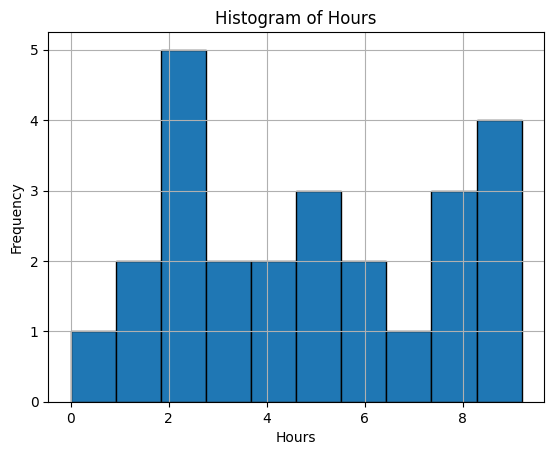

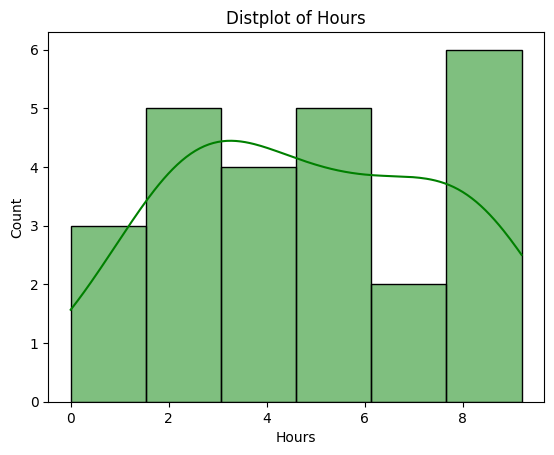

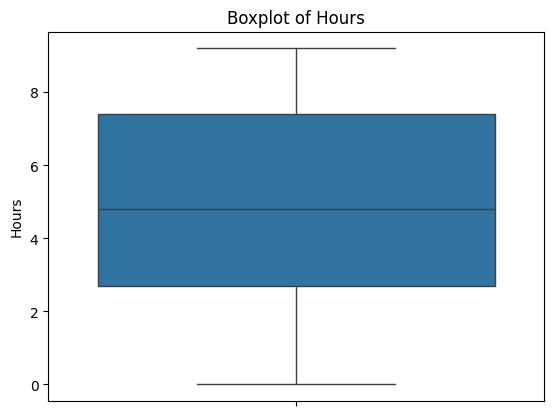

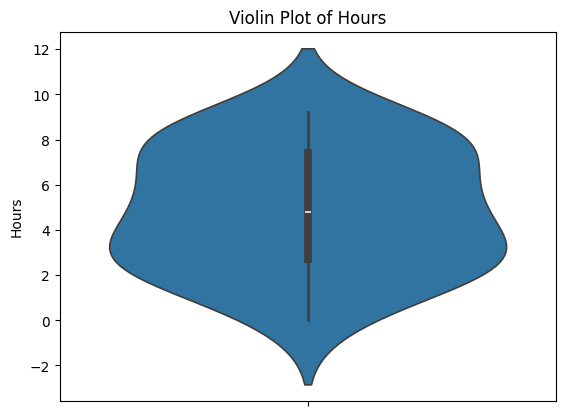

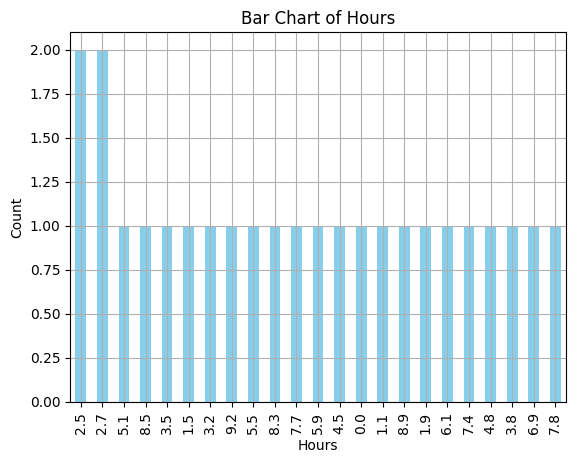

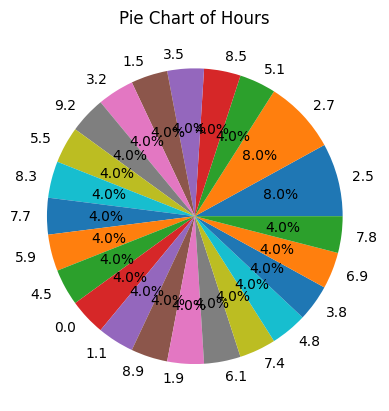

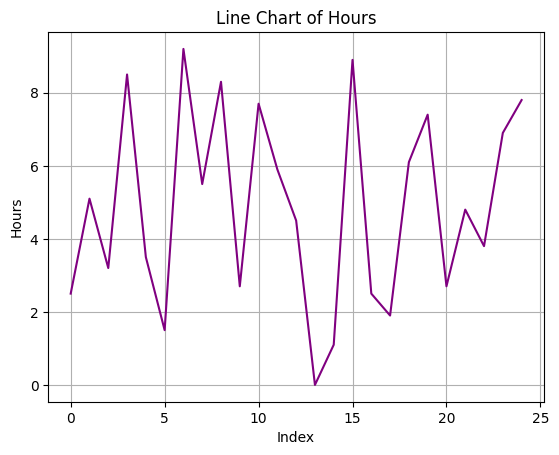

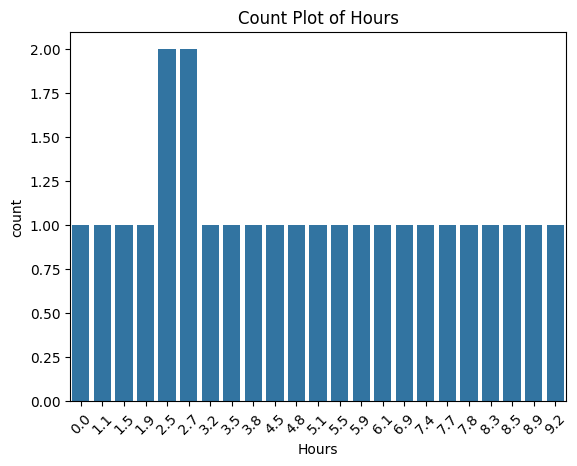

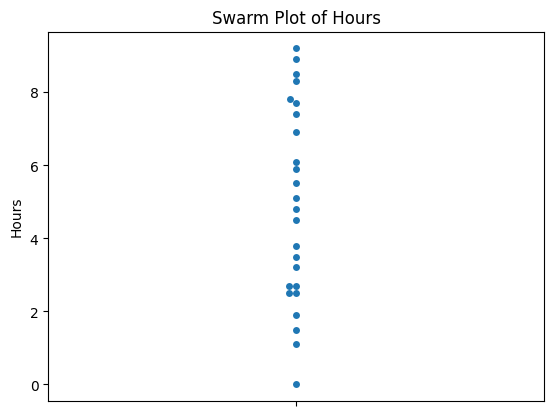

In [36]:
# Step 1: Create the UnivariateAnalysis object
uni_analysis = UnivariateAnalysis(df)  # 'df' is your processed DataFrame

# Step 2: Apply statistical methods on 'Hours'
uni_analysis.calculate_mean("Hours")
uni_analysis.calculate_median("Scores")
uni_analysis.calculate_mode("Hours")
uni_analysis.calculate_std("Scores")
uni_analysis.calculate_min("Hours")
uni_analysis.calculate_max("Scores")
uni_analysis.calculate_skewness("Hours")
uni_analysis.calculate_kurtosis("Scores")
uni_analysis.visualize_univariate("Hours")




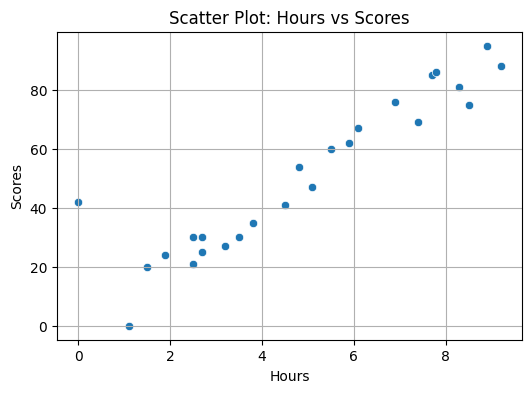

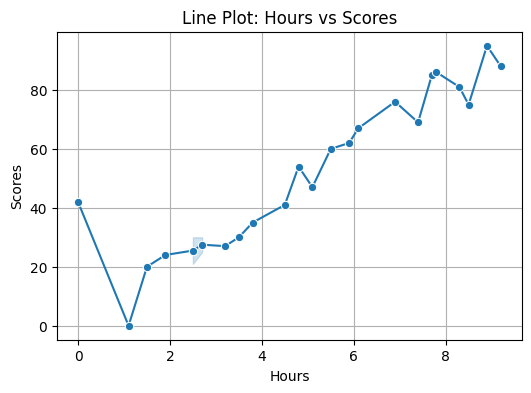

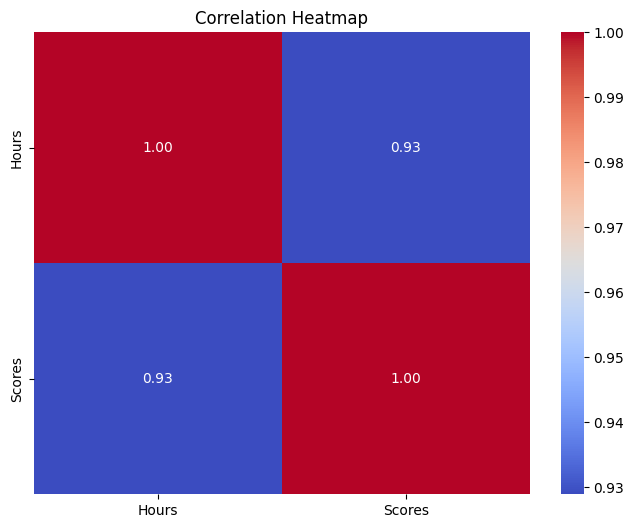

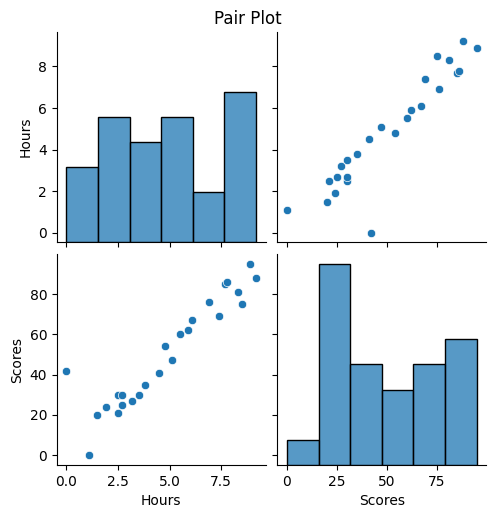

In [22]:

bivar = BivariateAnalysis(df)

# Scatter plot between Hours and Scores
bivar.scatter_plot("Hours", "Scores")

# Line plot
bivar.line_plot("Hours", "Scores")

# Heatmap
bivar.correlation_heatmap()

# Pair plot
bivar.pair_plot(["Hours", "Scores"])



In [19]:

# Ensure the target column is specified correctly   


# Create model object
model_obj = Model(data=df, target_column="Hours")

# Split into training and testing sets
X_train, X_test, y_train, y_test = model_obj.split_data()

print("\nData split into training and testing sets successfully.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Create a pipeline with StandardScaler and SVR 



Data split into training and testing sets successfully.
Training set shape: (20, 1), (20,)
Testing set shape: (5, 1), (5,)


In [32]:

# Train example model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Save model using your class
save_obj = Save_Model(model=lr, filename="student_model.pkl")
save_obj.save_model()


Model saved successfully to student_model.pkl
